In [ ]:
!pip install -Uqq fastai duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 40.3 MB/s eta 0:00:00


In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [ ]:
urls = search_images('open mouth closeup', max_images=1)
urls[0]

Searching for 'open mouth closeup'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


'https://thumbs.dreamstime.com/b/open-mouth-woman-close-up-studio-shot-73550778.jpg'

In [ ]:
urls = search_images('open mouth closeup', max_images=1)
urls[0]

Searching for 'open mouth closeup'


'https://thumbs.dreamstime.com/b/open-mouth-woman-close-up-studio-shot-73550778.jpg'

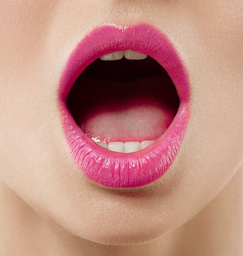

In [ ]:
from fastdownload import download_url
dest = 'open-mouth-example.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [ ]:
searches = 'open','closed'
path = Path('opened_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} mouth closeup'))
    sleep(10)
    download_images(dest, urls=search_images(f'person with {o} mouth'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'open mouth closeup'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


Searching for 'person with open mouth'
Searching for 'closed mouth closeup'
Searching for 'person with closed mouth'


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

7

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


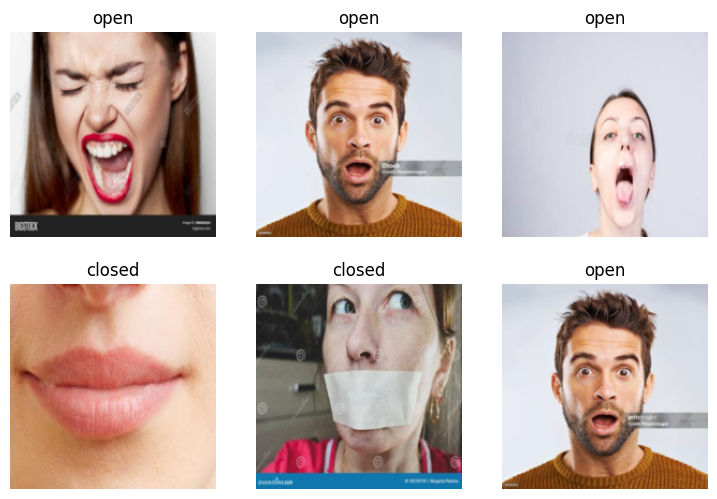

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 143MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.450005,0.828966,0.285714,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.730081,0.588600,0.238095,00:20
1,0.618588,0.635368,0.333333,00:16
2,0.563680,0.611776,0.380952,00:14


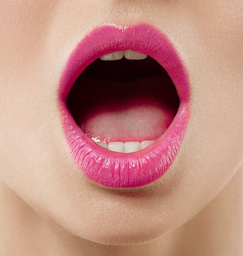

This is a open mouth.
Probability it's an open mouth: 0.9874


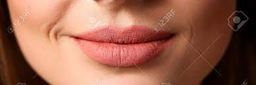

This is a closed mouth.
Probability it's an closed mouth: 0.6277


In [ ]:
def predict_image(file_name):
    display(Image.open(file_name).to_thumb(256,256))
    output,index,probs = learn.predict(file_name)
    print(f"This is a {output} mouth.")
    print(f"Probability it's an {output} mouth: {probs[index]:.4f}")

predict_image("open-mouth-example.jpg")
predict_image("/content/cloose.jpeg")